<a href="https://colab.research.google.com/github/lenardoh3/ml-hackathon-binary-classification/blob/main/Cucumber_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of Hackathon
For the training data, the shortlisting decision results are provided in the 'result' column. A value of 1 indicates that the applicant was shortlisted by the hiring manager, while a value of 0 indicates they were not.

For the testing data, the 'result' column is not provided. Participants are expected to predict the shortlisting outcome using their own methods. The predictions will be compared against the ground truth after the event concludes, and the accuracy of these predictions will be a major criterion for determining the winners.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#     Main: This is the primary feature table that includes information on skills and job requirements.

train_main = pd.read_csv("/content/train_data_main.csv", engine = 'python')
test_main = pd.read_csv("/content/test_data_main.csv")

#     Experience (_exp): This file contains metadata of the candidates' work experience as updated by them on the platform.
# train_exp = pd.read_csv("/content/train_data_exp.csv", engine = 'python')
# test_exp = pd.read_csv("/content/test_data_exp.csv")

#     CV Experience (_cv_exp): Similar to the _exp file, but the data is parsed from the candidates' uploaded resumes.
# train_cv_exp = pd.read_csv("/content/train_data_cv_exp.csv")
# test_cv_exp = pd.read_csv("/content/test_data_cv_exp.csv")


In [ ]:
train_main.head()

,Unnamed: 0,profile_id,document_index,skill_name,cv_skill_name,expected_salary,working_years,job_id,job_skill,job_name,job_desc,job_req,job_min_salary,job_max_salary,function_name,result
0,146,5889672,561275a77af68ee0dd380a1b02edf9a8c211ee994cc02b...,"['Due Diligence', 'Sustainability Strategy', '...",[],NaN,25.0,8861516,"['Sustainability Strategy', 'Sustainability Co...",Sustainability Senior Manager,"<p>Chanel is committed to sustainability, with...",NaN,12000,17000,Others,0.0
1,147,4364027,4b288ec3d4dab40326d2b9c9d50567030af6311c934b8b...,"['Business Analysis', 'Employee Relations', 'R...","['Travel Technology', 'Visual Basic for Applic...",NaN,15.0,8861516,"['Sustainability Strategy', 'Sustainability Co...",Sustainability Senior Manager,"<p>Chanel is committed to sustainability, with...",NaN,12000,17000,Others,0.0
2,148,4431024,b731b8f6dd3c152f8a326931656067d3987500cf356063...,"['Science', 'Research Ethics', 'Biotechnology'...","['Visual Basic for Applications', 'Artificial ...",NaN,6.0,8861516,"['Sustainability Strategy', 'Sustainability Co...",Sustainability Senior Manager,"<p>Chanel is committed to sustainability, with...",NaN,12000,17000,Others,0.0
3,149,12637377,4c7700e9d343387b375bdaee32021ae516c6fa5cf8226c...,"['Due Diligence', 'MS Excel', 'Sustainability ...","['Customer Relationship Management', 'End to E...",NaN,16.0,8861516,"['Sustainability Strategy', 'Sustainability Co...",Sustainability Senior Manager,"<p>Chanel is committed to sustainability, with...",NaN,12000,17000,Others,1.0
4,150,5884036,c7f9237193a47fcbf903e23e09e0e1e6b2caaf3c577d7d...,"['Due Diligence', 'Presentation Skills', 'Dete...","['Customer Relationship Management', 'Teamwork...",4600.0,7.0,8861516,"['Sustainability Strategy', 'Sustainability Co...",Sustainability Senior Manager,"<p>Chanel is committed to sustainability, with...",NaN,12000,17000,Others,0.0


In [ ]:
train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10163 entries, 0 to 10162
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10163 non-null  int64  
 1   profile_id       10163 non-null  int64  
 2   document_index   10112 non-null  object 
 3   skill_name       10163 non-null  object 
 4   cv_skill_name    10163 non-null  object 
 5   expected_salary  5574 non-null   float64
 6   working_years    10163 non-null  float64
 7   job_id           10163 non-null  int64  
 8   job_skill        10163 non-null  object 
 9   job_name         10163 non-null  object 
 10  job_desc         10163 non-null  object 
 11  job_req          0 non-null      float64
 12  job_min_salary   10163 non-null  int64  
 13  job_max_salary   10163 non-null  int64  
 14  function_name    10163 non-null  object 
 15  result           10163 non-null  float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.2+ MB


# Preprocess Data


-Function name can use Target Encoding

-job min_salary and max_salary are highly correlated

-job_desc seems too hard, is basically nlp

-maybe can engineer feature of 'max+min/2 - expected? If expected is NaN then just 0

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
import ast
import matplotlib.pyplot as plt
import seaborn as sns
def preprocessing(df):
  df['skill_name'] = df['skill_name'].apply(ast.literal_eval)
  df['job_skill'] = df['job_skill'].apply(ast.literal_eval)
  df['cv_skill_name'] = df['cv_skill_name'].apply(ast.literal_eval)

  skill_match_count = []
  skill_count = []
  job_skill_count = []
  skill_over_job = []
  for i in range(len(df['skill_name'])):
    candidate_skills = set(df['skill_name'][i] + df['cv_skill_name'][i])
    job_reqs = set(df['job_skill'][i])
    skill_count.append(len(candidate_skills))
    job_skill_count.append(len(job_reqs))
    skill_over_job.append(len(candidate_skills)/len(job_reqs))
    skill_match_count.append(len(candidate_skills.intersection(job_reqs)))
  df['skill_match'] = skill_match_count
  df['skill_count'] = skill_count
  df['job_skill_count'] = job_skill_count
  df['skill_over_job'] = skill_over_job

  df['avg_salary'] = (df['job_max_salary'] + df['job_min_salary']) / 2
  df['salary_diff'] =  ((df['avg_salary'] - df['expected_salary']).fillna(0))/df['avg_salary']
  df['expected_filled'] = df['expected_salary'].notna()

  features = ['skill_match', 'working_years',
              'avg_salary', 'salary_diff',
              'skill_count', 'job_skill_count', 'skill_over_job'
              ]
  X = df[features]
  scaler = StandardScaler()
  columns = X.columns
  X_norm = scaler.fit_transform(X)
  X = pd.DataFrame(X_norm, columns = columns)
  X = np.clip(X, -5, 5)
  X['salary_diff'] = np.clip(X['salary_diff'], 0, 5)
  return X

In [ ]:
train_main = pd.read_csv("/content/train_data_main.csv")
y = train_main['result']
X = preprocessing(train_main)

In [ ]:
X.head()

,skill_match,working_years,avg_salary,salary_diff,skill_count,job_skill_count,skill_over_job
0,-1.063733,1.732031,1.862405,0.046159,0.766864,-1.546856,1.737402
1,-1.754956,0.483378,1.862405,0.046159,-0.288541,-1.546856,0.281738
2,-1.754956,-0.640409,1.862405,0.046159,-1.088606,-1.546856,-0.821748
3,0.088304,0.608244,1.862405,0.046159,1.073271,-1.546856,2.160013
4,-0.602918,-0.515544,1.862405,0.048557,0.954113,-1.546856,1.995664


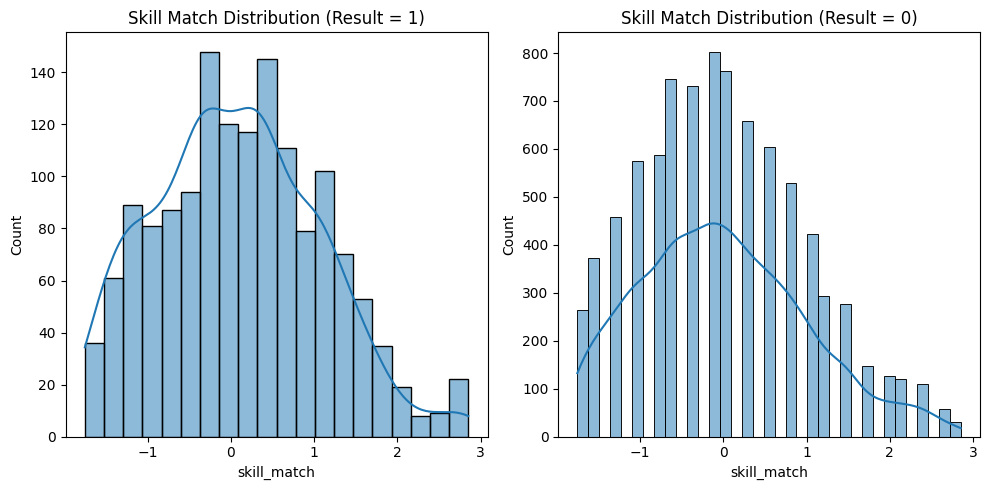

In [ ]:
#@title Skill Match Distribution

import matplotlib.pyplot as plt
import seaborn as sns

visualise = X.copy()
visualise['result'] = y

# Create two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot distribution for result=1
sns.histplot(visualise[visualise.result == 1]['skill_match'], ax=ax[0], kde=True)
ax[0].set_title('Skill Match Distribution (Result = 1)')

# Plot distribution for result=0
sns.histplot(visualise[visualise.result == 0]['skill_match'], ax=ax[1], kde=True)
ax[1].set_title('Skill Match Distribution (Result = 0)')

plt.tight_layout()
plt.show()


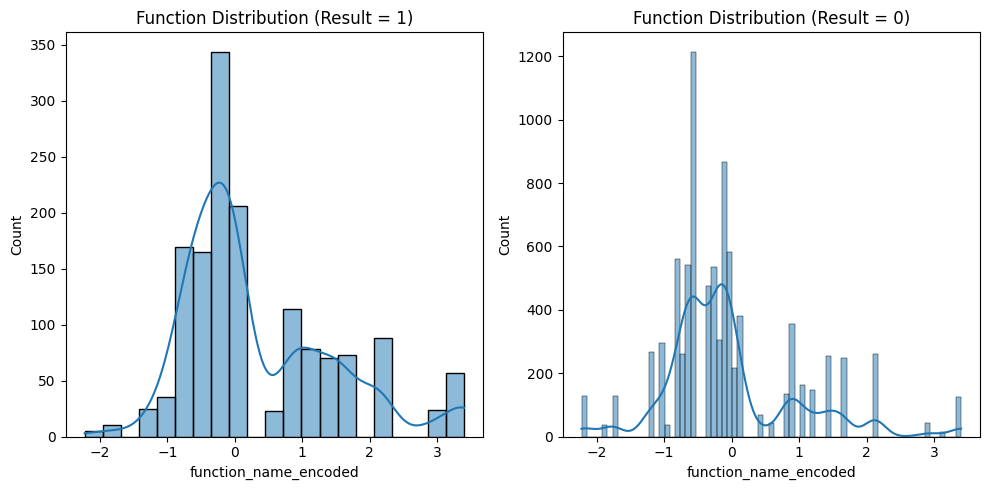

In [ ]:
#@title Function Distribution

visualise = X.copy()
visualise['result'] = y

# Create two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot distribution for result=1
sns.histplot(visualise[visualise.result == 1]['function_name_encoded'], ax=ax[0], kde=True)
ax[0].set_title('Function Distribution (Result = 1)')

# Plot distribution for result=0
sns.histplot(visualise[visualise.result == 0]['function_name_encoded'], ax=ax[1], kde=True)
ax[1].set_title('Function Distribution (Result = 0)')

plt.tight_layout()
plt.show()

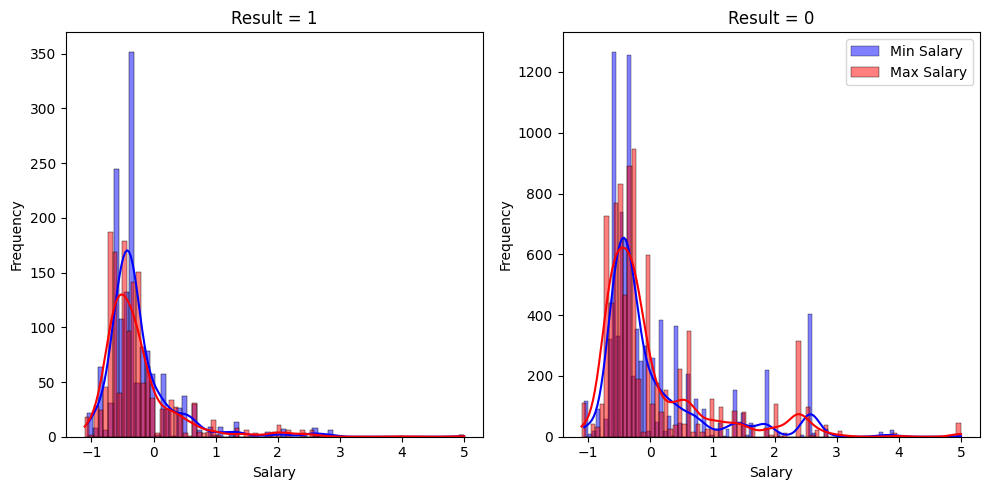

In [ ]:
#@title Max/Min Salary Distribution

visualise = X.copy()
visualise['result'] = y

# Create two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot distribution for result=1
sns.histplot(visualise[visualise.result == 1]['job_min_salary'], ax=ax[0], kde=True, label='Min Salary', color='blue')
sns.histplot(visualise[visualise.result == 1]['job_max_salary'], ax=ax[0], kde=True, label='Max Salary', color='red')
ax[0].set_title('Result = 1')

# Plot distribution for result=0
sns.histplot(visualise[visualise.result == 0]['job_min_salary'], ax=ax[1], kde=True, label='Min Salary', color='blue')
sns.histplot(visualise[visualise.result == 0]['job_max_salary'], ax=ax[1], kde=True, label='Max Salary', color='red')
ax[1].set_title('Result = 0')

ax[0].set_xlabel('Salary')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('Salary')
ax[1].set_ylabel('Frequency')
plt.legend()


plt.tight_layout()
plt.show()


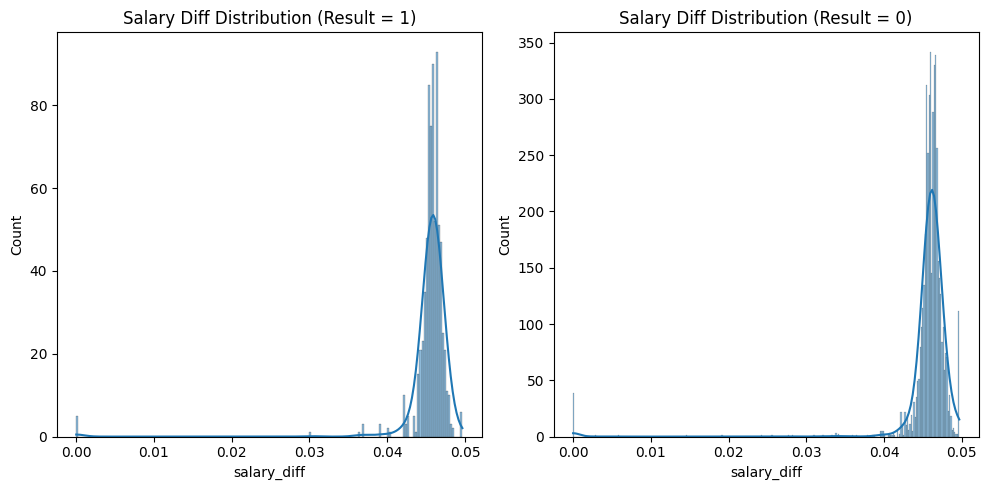

In [ ]:
#@title Salary Diff Distribution

visualise = X.copy()
visualise['result'] = y
visualise = visualise[visualise.salary_diff != visualise.salary_diff.mode()[0]]

# Create two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot distribution for result=1
sns.histplot(visualise[visualise.result == 1]['salary_diff'], ax=ax[0], kde=True)
ax[0].set_title('Salary Diff Distribution (Result = 1)')

# Plot distribution for result=0
sns.histplot(visualise[visualise.result == 0]['salary_diff'], ax=ax[1], kde=True)
ax[1].set_title('Salary Diff Distribution (Result = 0)')

plt.tight_layout()
plt.show()

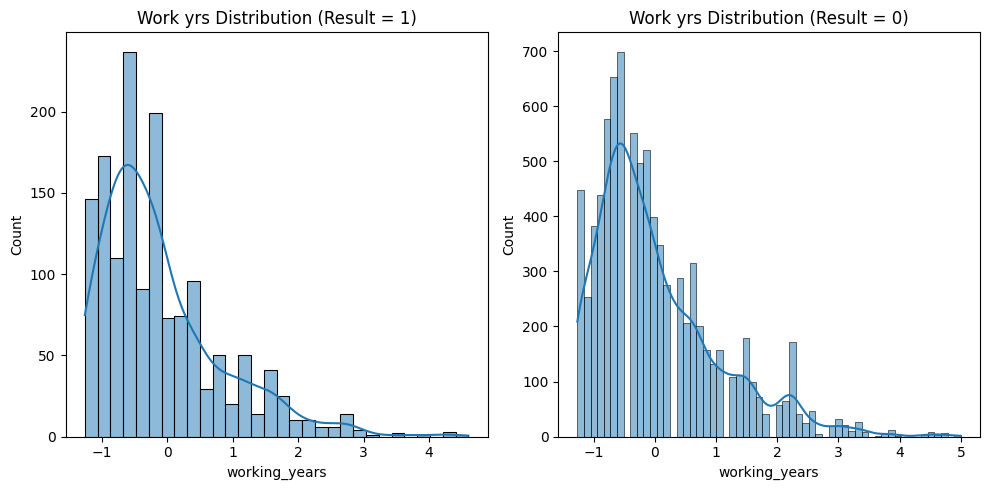

In [ ]:
#@title Years Work Exp. Distribution

visualise = X.copy()
visualise['result'] = y

# Create two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot distribution for result=1
sns.histplot(visualise[visualise.result == 1]['working_years'], ax=ax[0], kde=True)
ax[0].set_title('Work yrs Distribution (Result = 1)')

# Plot distribution for result=0
sns.histplot(visualise[visualise.result == 0]['working_years'], ax=ax[1], kde=True)
ax[1].set_title('Work yrs Distribution (Result = 0)')

plt.tight_layout()
plt.show()

# Synthetic Generation

I'm gonna try:

1. set aside 20% of original dataset as Test

2. from the 80%, do SMOTE and UnderSampling to get a balanced dataset

3. train using balanced dataset

4. test using the original 20% undoctored data

In [ ]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [ ]:
#parameters to test:
count_zero = (train_main['result'] == 0).sum()
count_one = (train_main['result'] == 1).sum()
no_effect = count_one/count_zero

smote_param = [no_effect, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
under_param = [no_effect, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

precision, recall, f1_score, accuracy = [[0 for i in range(len(under_param))] for j in range(len(smote_param))], [[0 for i in range(len(under_param))] for j in range(len(smote_param))], [[0 for i in range(len(under_param))] for j in range(len(smote_param))], [[0 for i in range(len(under_param))] for j in range(len(smote_param))]

for i in range(len(smote_param)):
  for j in range(len(under_param)):
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
    over = SMOTE(sampling_strategy=smote_param[i])
    under = RandomUnderSampler(sampling_strategy=under_param[j])
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    try:
      train_X, train_y = pipeline.fit_resample(train_X, train_y)
    except:
      continue

    rnd_clf = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42)
    rnd_clf.fit(train_X, train_y)
    y_pred = rnd_clf.predict(test_X)
    precision[i][j] = metrics.precision_score(test_y, y_pred)
    recall[i][j] = metrics.recall_score(test_y, y_pred)
    f1_score[i][j] = metrics.f1_score(test_y, y_pred)
    accuracy[i][j] =metrics.accuracy_score(test_y, y_pred)

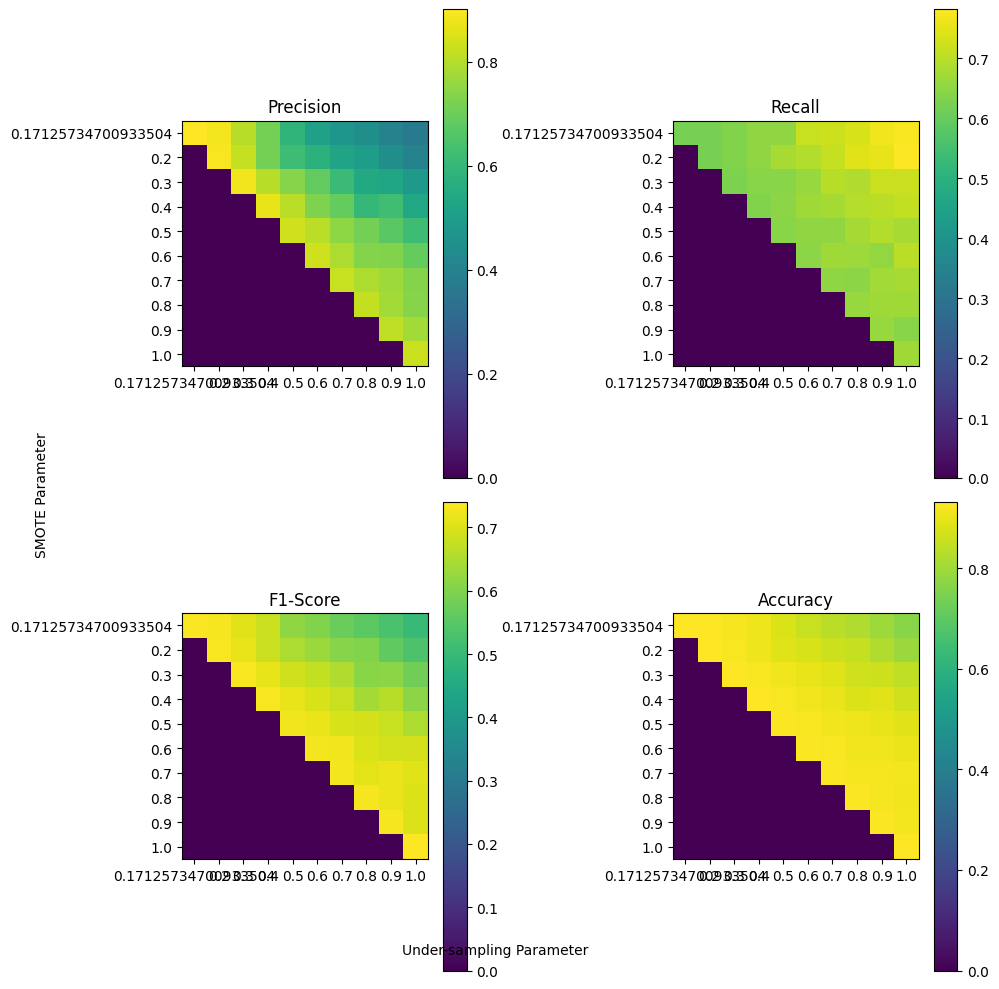

In [ ]:
#@title Results for each smote_param and under_param
import matplotlib.pyplot as plt
import numpy as np

# Assuming precision, recall, f1_score, accuracy are 2D lists as defined in the problem

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot Precision
im = axs[0, 0].imshow(precision, cmap='viridis')
axs[0, 0].set_title('Precision')
axs[0, 0].set_xticks(np.arange(len(under_param)))
axs[0, 0].set_yticks(np.arange(len(smote_param)))
axs[0, 0].set_xticklabels(under_param)
axs[0, 0].set_yticklabels(smote_param)
fig.colorbar(im, ax=axs[0, 0])

# Plot Recall
im = axs[0, 1].imshow(recall, cmap='viridis')
axs[0, 1].set_title('Recall')
axs[0, 1].set_xticks(np.arange(len(under_param)))
axs[0, 1].set_yticks(np.arange(len(smote_param)))
axs[0, 1].set_xticklabels(under_param)
axs[0, 1].set_yticklabels(smote_param)
fig.colorbar(im, ax=axs[0, 1])

# Plot F1-Score
im = axs[1, 0].imshow(f1_score, cmap='viridis')
axs[1, 0].set_title('F1-Score')
axs[1, 0].set_xticks(np.arange(len(under_param)))
axs[1, 0].set_yticks(np.arange(len(smote_param)))
axs[1, 0].set_xticklabels(under_param)
axs[1, 0].set_yticklabels(smote_param)
fig.colorbar(im, ax=axs[1, 0])

# Plot Accuracy
im = axs[1, 1].imshow(accuracy, cmap='viridis')
axs[1, 1].set_title('Accuracy')
axs[1, 1].set_xticks(np.arange(len(under_param)))
axs[1, 1].set_yticks(np.arange(len(smote_param)))
axs[1, 1].set_xticklabels(under_param)
axs[1, 1].set_yticklabels(smote_param)
fig.colorbar(im, ax=axs[1, 1])

# Set common labels
fig.text(0.5, 0.04, 'Under-sampling Parameter', ha='center')
fig.text(0.04, 0.5, 'SMOTE Parameter', va='center', rotation='vertical')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
# Find the indices of the maximum accuracy
max_index = np.unravel_index(np.argmax(accuracy), np.array(accuracy).shape)

# Print the indices
print("Indices of highest accuracy: ", max_index)
print(accuracy[max_index[0]][max_index[1]])
print("without SMOTE or Under-Sampling: " + str(accuracy[0][0]))


Indices of highest accuracy:  (0, 0)
0.9326119035907526
dont do anything: 0.765371372356124


# Tuning Model Hyperparameters


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [330]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_X, train_y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [330]},
             verbose=2)

In [ ]:
best_params = grid_search.best_params_
best_params

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 330}

# Final Model

In [ ]:
best_params = {'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 330}
final_model = RandomForestClassifier(**best_params, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


final_model.fit(train_X, train_y)
y_pred = final_model.predict(test_X)
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print('accuracy:')
print(accuracy_score(test_y, y_pred))
print('precision:')
print(metrics.precision_score(test_y, y_pred))
print('recall:')
print(metrics.recall_score(test_y, y_pred))
print('f1:')
print(metrics.f1_score(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1726
         1.0       0.97      0.64      0.77       307

    accuracy                           0.94      2033
   macro avg       0.95      0.82      0.87      2033
weighted avg       0.94      0.94      0.94      2033

[[1719    7]
 [ 109  198]]
accuracy:
0.9429414658140679
precision:
0.9658536585365853
recall:
0.6449511400651465
f1:
0.7734375


# Submission

In [ ]:
best_params = {'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 330}
final_model = RandomForestClassifier(**best_params, random_state=42)
y_train_main = train_main['result']
X_train_main = preprocessing(train_main)
X_test_main = preprocessing(test_main)
final_model.fit(X_train_main, y_train_main)
y_pred = final_model.predict(X_test_main)


submission = pd.DataFrame(data={' ':test_main['Unnamed: 0'], 'result' : y_pred})
submission.to_csv('submission.csv', index=False)

In [ ]:
Counter(submission.result)

Counter({0.0: 4789, 1.0: 51})

In [ ]:
submission.head()

,,result
0,1684,0.0
1,1685,0.0
2,1686,0.0
3,3787,0.0
4,3788,0.0


# Testing

In [ ]:
#Full Code
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import ast
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

#Pre-processing function
def preprocessing(df):
  df['skill_name'] = df['skill_name'].apply(ast.literal_eval)
  df['job_skill'] = df['job_skill'].apply(ast.literal_eval)
  df['cv_skill_name'] = df['cv_skill_name'].apply(ast.literal_eval)

  skill_match_count = []
  skill_count = []
  job_skill_count = []
  skill_over_job = []
  for i in range(len(df['skill_name'])):
    candidate_skills = set(df['skill_name'][i] + df['cv_skill_name'][i])
    job_reqs = set(df['job_skill'][i])
    skill_count.append(len(candidate_skills))
    job_skill_count.append(len(job_reqs))
    skill_over_job.append(len(candidate_skills)/len(job_reqs))
    skill_match_count.append(len(candidate_skills.intersection(job_reqs)))
  df['skill_match'] = skill_match_count
  df['skill_count'] = skill_count
  df['job_skill_count'] = job_skill_count
  df['skill_over_job'] = skill_over_job

  df['avg_salary'] = (df['job_max_salary'] + df['job_min_salary']) / 2
  df['salary_diff'] =  ((df['avg_salary'] - df['expected_salary']).fillna(0))/df['avg_salary']
  df['expected_filled'] = df['expected_salary'].notna()

  features = ['skill_match', 'working_years',
              'avg_salary', 'salary_diff',
              'skill_count', 'job_skill_count', 'skill_over_job'
              ]
  X = df[features]
  scaler = StandardScaler()
  columns = X.columns
  X_norm = scaler.fit_transform(X)
  X = pd.DataFrame(X_norm, columns = columns)
  X = np.clip(X, -5, 5)
  X['salary_diff'] = np.clip(X['salary_diff'], 0, 5)
  return X

#Final Model
train_main = pd.read_csv("/content/train_data_main.csv", engine = 'python')
test_main = pd.read_csv("/content/test_data_main.csv")

best_params = {
    'bootstrap': True,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 330
    }
final_model = RandomForestClassifier(**best_params, random_state=42)
y_train_main = train_main['result']
X_train_main = preprocessing(train_main)
X_test_main = preprocessing(test_main)
final_model.fit(X_train_main, y_train_main)
y_pred = final_model.predict(X_test_main)

submission = pd.DataFrame(data={' ':test_main['Unnamed: 0'], 'result' : y_pred})
submission.to_csv('submission.csv', index=False)

In [ ]:
Counter(submission['result'])

Counter({0.0: 4789, 1.0: 51})

In [ ]:
#preprocessing: missing values, encoding, scaling, splitting data
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import ast
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#for metrics check
from sklearn import metrics

train_main = pd.read_csv("/content/train_data_main.csv", engine = 'python')
test_main = pd.read_csv("/content/test_data_main.csv")

#turning strings into lists
def preprocessing(df):
  df['skill_name'] = df['skill_name'].apply(ast.literal_eval)
  df['job_skill'] = df['job_skill'].apply(ast.literal_eval)
  df['cv_skill_name'] = df['cv_skill_name'].apply(ast.literal_eval)
#combing skills features into one but what if some skills that doesnt match are looked at?
  skill_match_count = []
  for i in range(len(df['skill_name'])):
    candidate_skills = set(df['skill_name'][i] + df['cv_skill_name'][i])
    job_reqs = set(df['job_skill'][i])
    skill_match_count.append(len(candidate_skills.intersection(job_reqs)))
  df['skill_match'] = skill_match_count

  df['avg_salary'] = (df['job_max_salary'] + df['job_min_salary']) / 2
  df['salary_diff'] =  ((df['avg_salary'] - df['expected_salary']).fillna(0))/df['avg_salary']
  #whats the rationale behind salary diff

  function_name_means = df.groupby('function_name')['result'].mean()
  df['function_name_encoded'] = df['function_name'].map(function_name_means)
  features = ['skill_match', 'working_years', 'job_min_salary', 'job_max_salary', 'salary_diff']
  #features = ['skill_match', 'working_years', 'job_min_salary', 'job_max_salary', 'salary_diff', 'skill_name' ]
  X, y = df[features], df['result']
  scaler = StandardScaler()
  columns = X.columns
  X_norm = scaler.fit_transform(X)
  X = pd.DataFrame(X_norm, columns = columns)
  X = np.clip(X, -5, 5)
  X['salary_diff'] = np.clip(X['salary_diff'], 0, 5)
  return X, y
X, y = preprocessing(train_main)
# Explore and preprocess the data
#print(data.head())
#print(data.isnull().sum())
#data = data.dropna()
# Separate features and target variable
#X = data.iloc[:, :-1].values
#y = data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=300,max_depth = None, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score:')
print(accuracy)
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# (Optional) Fine-tune the model
#more estimators = more trees more accuracy, depth=complexity got overfitting or someshit
#but changing this doesnt seem to affect results?
clf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# (Optional) Save the trained model
#import joblib
#joblib.dump(clf, 'random_forest_model.pkl')

# (Optional) Load the trained model
#clf = joblib.load('random_forest_model.pkl')
#y_pred = clf.predict(X_test)

Accuracy score:
0.9331037875061485
Precision: 0.9014084507042254
Recall: 0.6254071661237784
F1 Score: 0.7384615384615385
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1726
         1.0       0.90      0.63      0.74       307

    accuracy                           0.93      2033
   macro avg       0.92      0.81      0.85      2033
weighted avg       0.93      0.93      0.93      2033

Confusion Matrix:
[[1705   21]
 [ 115  192]]
